<a href="https://colab.research.google.com/github/Avas77/apache-pyspark-by-example-802868/blob/crimes-day-of-week/crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

In [7]:
rc = spark.read.csv("crime.csv", header=True)
rc.show(truncate=False)

+---------------+------------+--------------------------------+------------------------------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+----------+-----------------+-----------+------------+---------------------------+
|INCIDENT_NUMBER|OFFENSE_CODE|OFFENSE_CODE_GROUP              |OFFENSE_DESCRIPTION                       |DISTRICT|REPORTING_AREA|SHOOTING|OCCURRED_ON_DATE   |YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART  |STREET           |Lat        |Long        |Location                   |
+---------------+------------+--------------------------------+------------------------------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+----------+-----------------+-----------+------------+---------------------------+
|I182070945     |00619       |Larceny                         |LARCENY ALL OTHERS                        |D14     |808           |NULL    |2018-09-02 13:00:00|2018|9    |Sunday     |13  |Par

In [12]:
from pyspark.sql.functions import to_timestamp, col, lit, date_format, dayofweek

rc.groupBy(col("OFFENSE_CODE_GROUP")).count().orderBy("count", ascending=False).show(5)

+--------------------+-----+
|  OFFENSE_CODE_GROUP|count|
+--------------------+-----+
|Motor Vehicle Acc...|37132|
|             Larceny|25935|
|  Medical Assistance|23540|
|  Investigate Person|18750|
|               Other|18075|
+--------------------+-----+
only showing top 5 rows



In [14]:
rc.select(col("OCCURRED_ON_DATE"), dayofweek(col("OCCURRED_ON_DATE")), date_format(col("OCCURRED_ON_DATE"), "E")).show()

+-------------------+---------------------------+--------------------------------+
|   OCCURRED_ON_DATE|dayofweek(OCCURRED_ON_DATE)|date_format(OCCURRED_ON_DATE, E)|
+-------------------+---------------------------+--------------------------------+
|2018-09-02 13:00:00|                          1|                             Sun|
|2018-08-21 00:00:00|                          3|                             Tue|
|2018-09-03 19:27:00|                          2|                             Mon|
|2018-09-03 21:16:00|                          2|                             Mon|
|2018-09-03 21:05:00|                          2|                             Mon|
|2018-09-03 21:09:00|                          2|                             Mon|
|2018-09-03 21:25:00|                          2|                             Mon|
|2018-09-03 20:39:37|                          2|                             Mon|
|2018-09-03 20:48:00|                          2|                             Mon|
|201

In [16]:
rc.groupBy(date_format(col("OCCURRED_ON_DATE"), "E")).count().orderBy("count", ascending=False).show()

+--------------------------------+-----+
|date_format(OCCURRED_ON_DATE, E)|count|
+--------------------------------+-----+
|                             Fri|48495|
|                             Wed|46729|
|                             Thu|46656|
|                             Tue|46383|
|                             Mon|45679|
|                             Sat|44818|
|                             Sun|40313|
+--------------------------------+-----+



In [17]:
rc.groupBy(date_format(col("OCCURRED_ON_DATE"), "E")).count().collect()

[Row(date_format(OCCURRED_ON_DATE, E)='Sun', count=40313),
 Row(date_format(OCCURRED_ON_DATE, E)='Mon', count=45679),
 Row(date_format(OCCURRED_ON_DATE, E)='Thu', count=46656),
 Row(date_format(OCCURRED_ON_DATE, E)='Sat', count=44818),
 Row(date_format(OCCURRED_ON_DATE, E)='Wed', count=46729),
 Row(date_format(OCCURRED_ON_DATE, E)='Tue', count=46383),
 Row(date_format(OCCURRED_ON_DATE, E)='Fri', count=48495)]

In [18]:
days = [x[0] for x in rc.groupBy(date_format(col("OCCURRED_ON_DATE"), "E")).count().collect()]
days

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [19]:
count = [x[1] for x in rc.groupBy(date_format(col("OCCURRED_ON_DATE"), "E")).count().collect()]
count

[40313, 45679, 46656, 44818, 46729, 46383, 48495]

In [20]:
import pandas as pd

crimes_df = pd.DataFrame({"days of week": days, "count": count})
crimes_df

,days of week,count
0,Sun,40313
1,Mon,45679
2,Thu,46656
3,Sat,44818
4,Wed,46729
5,Tue,46383
6,Fri,48495


AttributeError: 'DataFrame' object has no attribute 'set_xlabel'

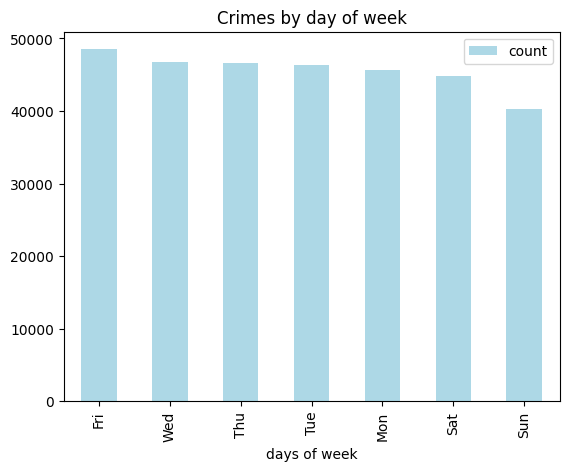

In [27]:
crimes_df.sort_values("count", ascending=False).plot(kind="bar", color="lightblue", title="Crimes by day of week", x="days of week", y="count")
crimes_df.set_xlabel("Day of Week")
crimes_df.set_ylabel("Count")